# 1. For reading and understanding import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r'G:\kaggle-24\Titanic-23\train.csv'
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Data preprocessing

In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

SibSp (Siblings/Spouses Aboard): The number of siblings or spouses the passenger had on board.
Parch (Parents/Children Aboard): The number of parents or children the passenger had on board.
                       Embarked: The port where the passenger boarded the ship. It can take values 
                                 'C' (Cherbourg), 'Q' (Queenstown), or 'S' (Southampton).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

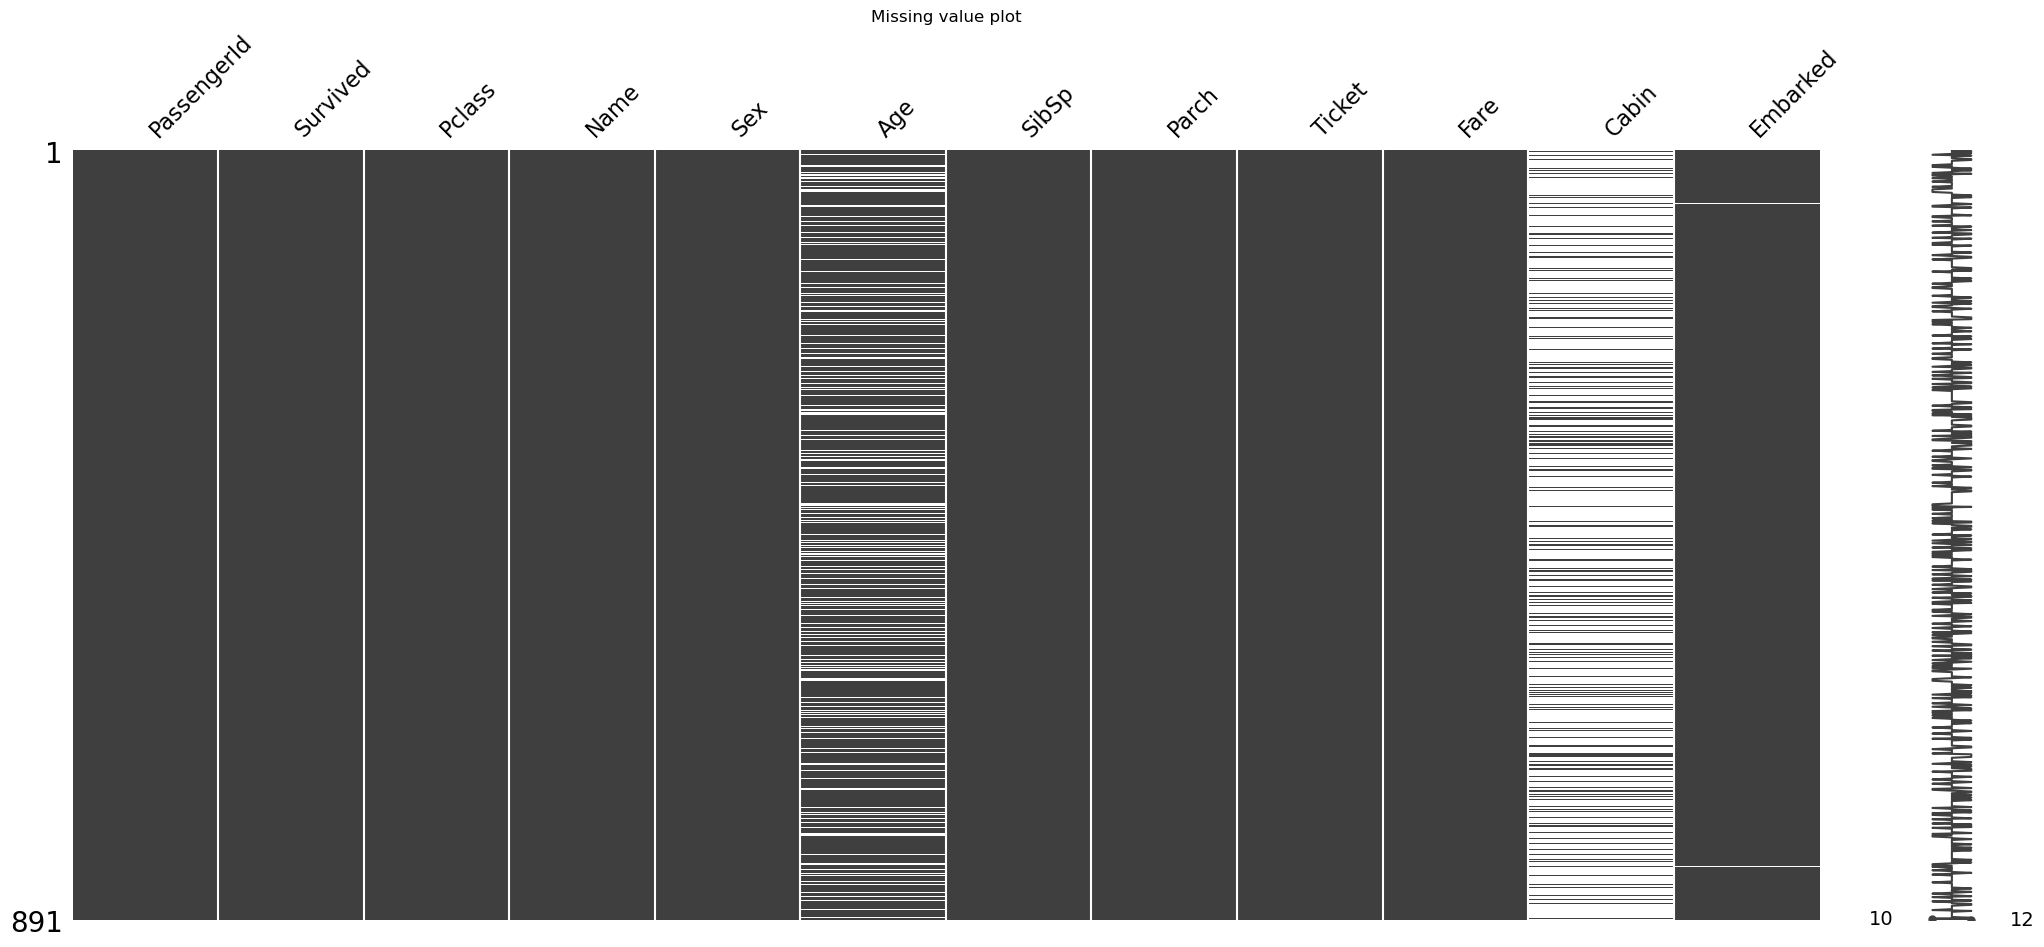

In [7]:
import missingno as msno
msno.matrix(df)
plt.title("Missing value plot")
plt.show()

In [8]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

Name
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'T

In [9]:
# Name, Cabin and Ticket feature is not relevant for predicting. So drop 3 features.
df.drop(columns = ["Name","Cabin","Ticket"], inplace = True)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [11]:
df['Age']= df['Age'].fillna(df['Age'].median())
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA

In [13]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print("."*50)

PassengerId
PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
..................................................
Survived
Survived
0    549
1    342
Name: count, dtype: int64
..................................................
Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
..................................................
Sex
Sex
male      577
female    314
Name: count, dtype: int64
..................................................
Age
Age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64
..................................................
SibSp
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
..................................................
Parch
Parch
0    678
1    118
2     80
5      5
3  

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

Not Survived    549
Survived        342
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64


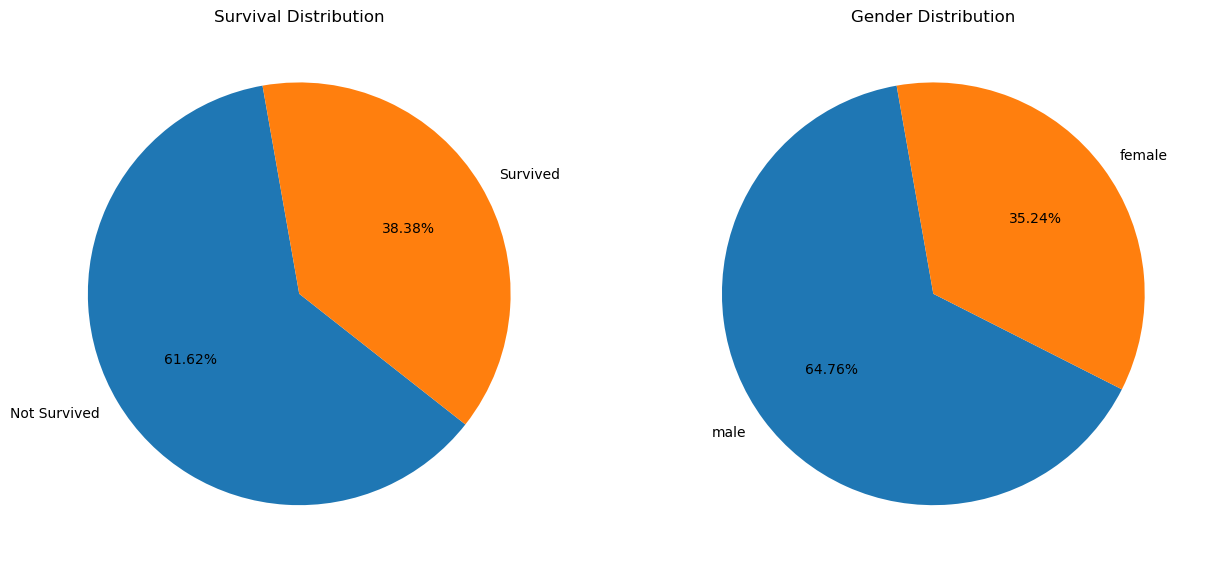

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Subplot 1: Pie chart for 'Survived'
plt.subplot(1, 2, 1)
value_survived = df['Survived'].value_counts()
value_survived.index = ['Not Survived', 'Survived']
print(value_survived)
plt.pie(value_survived, labels=value_survived.index, autopct="%1.2f%%", startangle=100)
plt.title('Survival Distribution')

# Subplot 2: Pie chart for 'Sex'
plt.subplot(1, 2, 2)
value_sex = df['Sex'].value_counts()
print(value_sex)
plt.pie(value_sex, labels=value_sex.index, autopct="%1.2f%%", startangle=100)
plt.title('Gender Distribution')

plt.show()

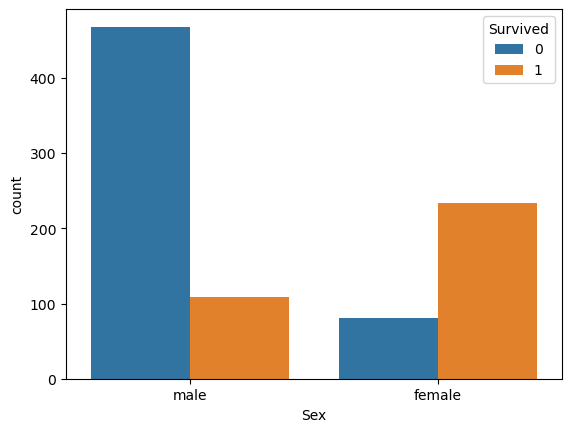

In [16]:
sns.countplot(data= df, x='Sex', hue='Survived')
plt.show()

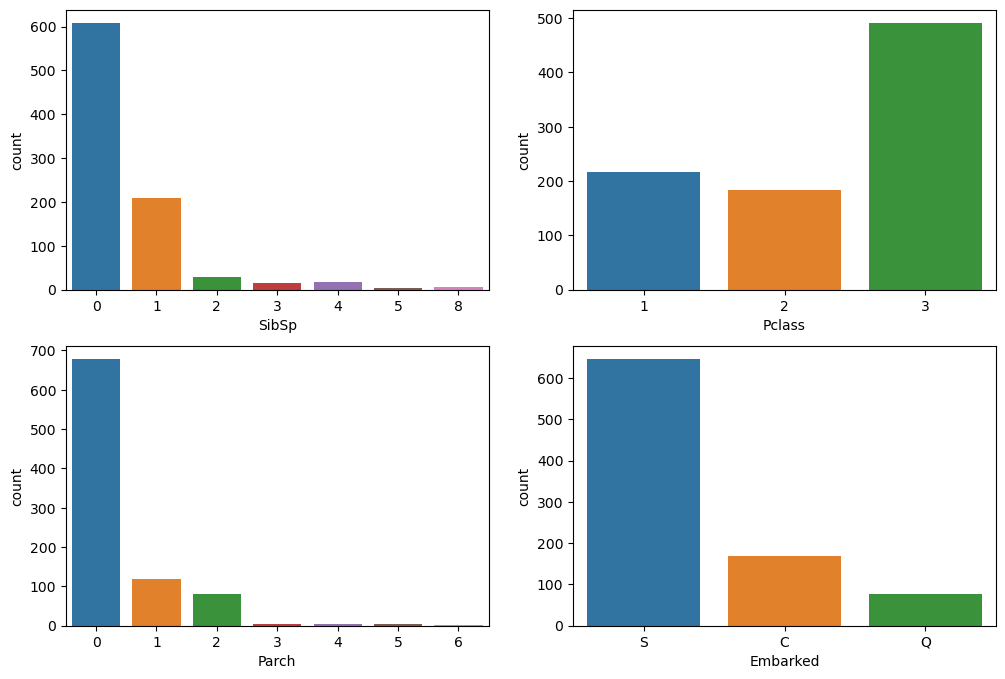

In [17]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data = df, x ="SibSp")

plt.subplot(2,2,2)
sns.countplot(data = df, x ="Pclass")

plt.subplot(2,2,3)
sns.countplot(data = df, x ="Parch")

plt.subplot(2,2,4)
sns.countplot(data = df, x ="Embarked")

plt.show()

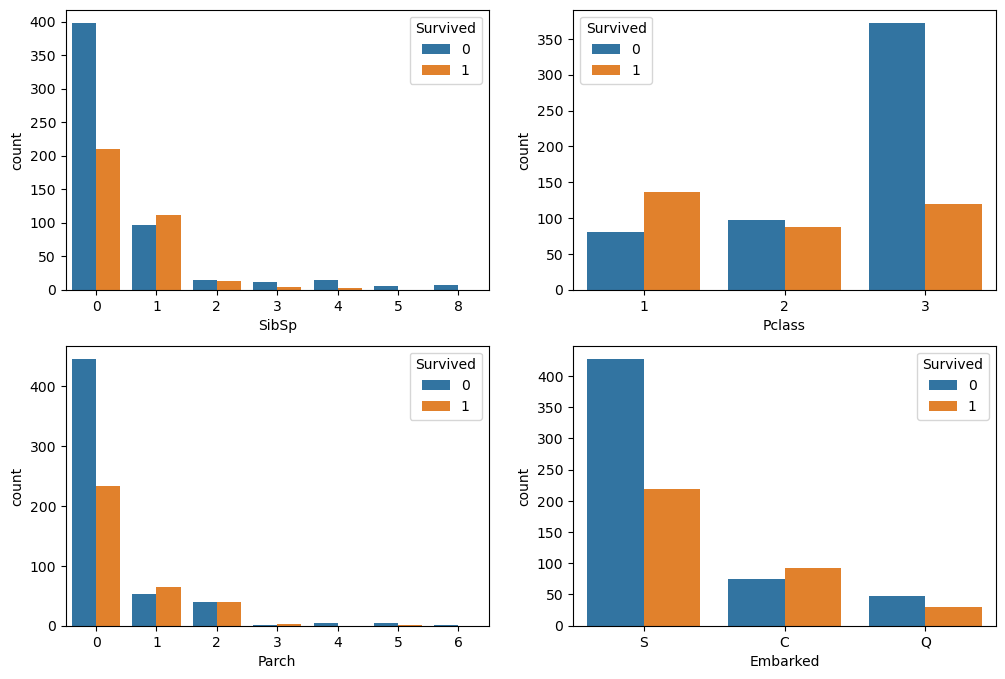

In [18]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data = df, x ="SibSp", hue = 'Survived')

plt.subplot(2,2,2)
sns.countplot(data = df, x ="Pclass", hue = 'Survived')

plt.subplot(2,2,3)
sns.countplot(data = df, x ="Parch", hue = 'Survived')

plt.subplot(2,2,4)
sns.countplot(data = df, x ="Embarked", hue = 'Survived')

plt.show()

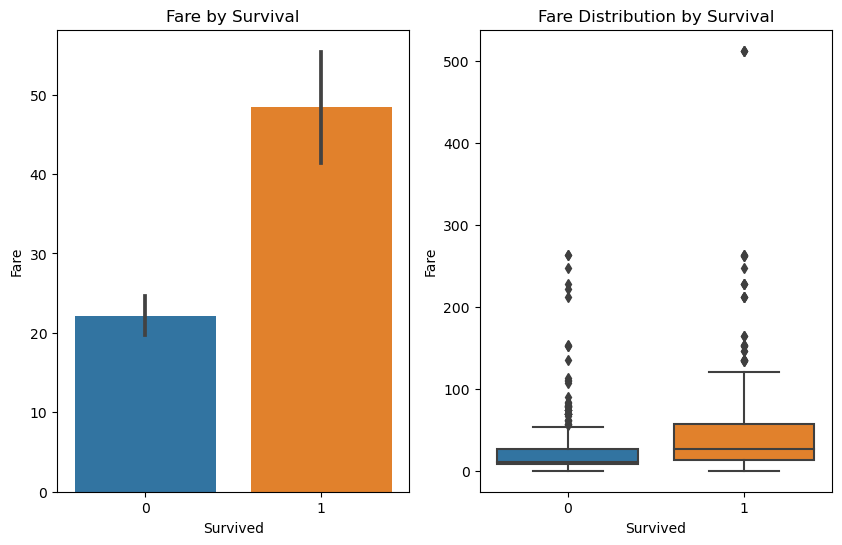

In [19]:
# Create a bar plot
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
sns.barplot(x='Survived', y='Fare', data=df)
plt.title('Fare by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')

plt.subplot(1,2,2)
sns.boxplot(x='Survived', y='Fare', data=df) 
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

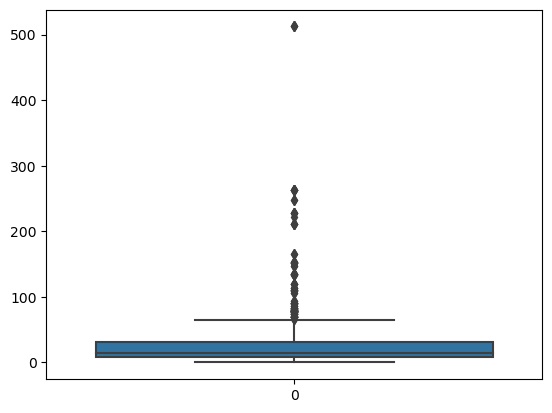

In [20]:
sns.boxplot(data=df['Fare']) 
plt.show()

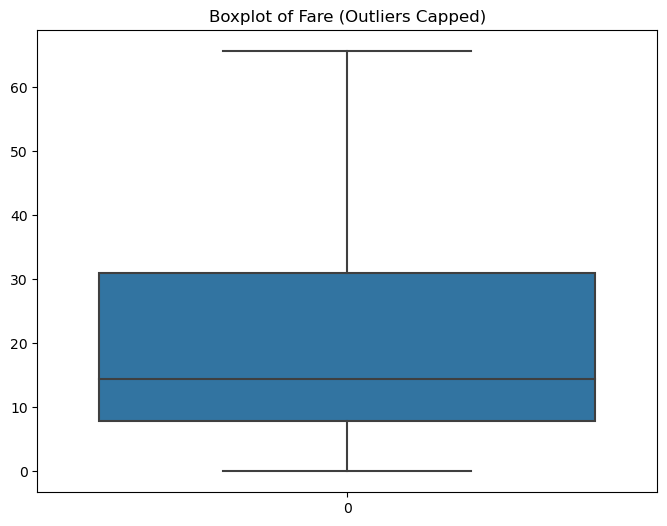

In [21]:
# Calculate quartiles and IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Cap outliers by setting values beyond the bounds to the bounds
df['Fare'] = np.where(df['Fare'] > upper, upper, df['Fare'])

# Visualize the boxplot after capping outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Fare'])
plt.title('Boxplot of Fare (Outliers Capped)')
plt.show()

Skewness of Original Fare: 1.082178592000912


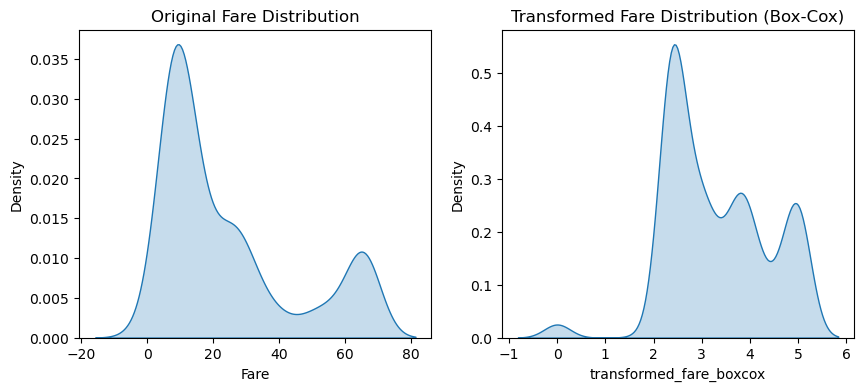

Skewness of Transformed Fare (Box-Cox): 0.0029667429570813717


In [22]:
from scipy.stats import boxcox

# Visualize the original distribution
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.kdeplot(df['Fare'], fill = True)
plt.title('Original Fare Distribution')


# Check skewness of the original "Fare" column
print("Skewness of Original Fare:", df['Fare'].skew())

# Apply the Box-Cox transformation
transformed_fare, lambda_value = boxcox(df['Fare'] + 1)  # Adding 1 to handle zero values
df['transformed_fare_boxcox'] = transformed_fare

# Visualize the transformed distribution
plt.subplot(1,2,2)
sns.kdeplot(df['transformed_fare_boxcox'], fill = True)
plt.title('Transformed Fare Distribution (Box-Cox)')
plt.show()

# Check skewness of the transformed "Fare" column
print("Skewness of Transformed Fare (Box-Cox):", df['transformed_fare_boxcox'].skew())

Skewness of Original Fare: 1.082178592000912


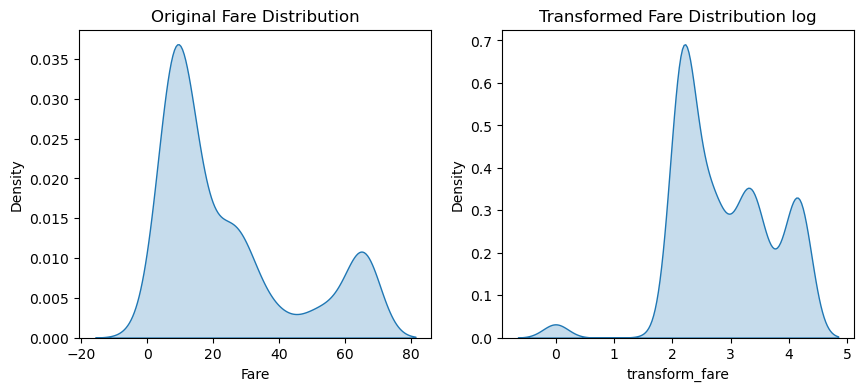

Skewness of Transformed Fare log: -0.2378769041514196


In [23]:
# Visualize the original distribution
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.kdeplot(df['Fare'], fill = True)
plt.title('Original Fare Distribution')


# Check skewness of the original "Fare" column
print("Skewness of Original Fare:", df['Fare'].skew())

# Apply the Box-Cox transformation
df['transform_fare'] = np.log1p(df['Fare'])

# Visualize the transformed distribution
plt.subplot(1,2,2)
sns.kdeplot(df['transform_fare'], fill = True)
plt.title('Transformed Fare Distribution log')
plt.show()

# Check skewness of the transformed "Fare" column
print("Skewness of Transformed Fare log:", df['transform_fare'].skew())

Skewness of Original Fare: 1.082178592000912


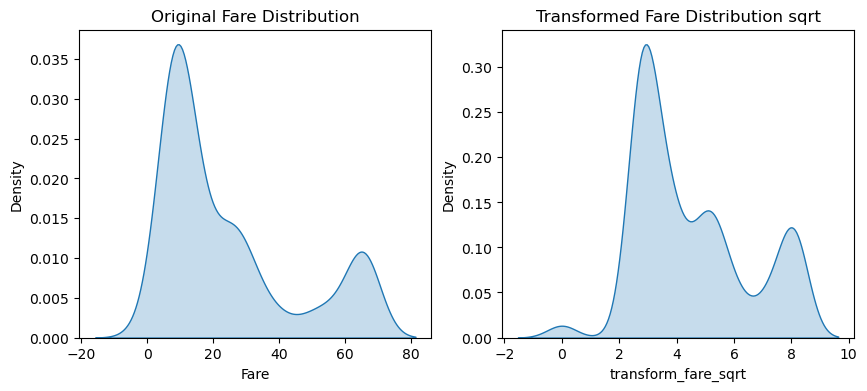

Skewness of Transformed Fare sqrt: 0.5820037280891327


In [24]:
# Visualize the original distribution
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.kdeplot(df['Fare'], fill = True)
plt.title('Original Fare Distribution')


# Check skewness of the original "Fare" column
print("Skewness of Original Fare:", df['Fare'].skew())

# Apply the Box-Cox transformation
df['transform_fare_sqrt'] = np.sqrt(df['Fare'])

# Visualize the transformed distribution
plt.subplot(1,2,2)
sns.kdeplot(df['transform_fare_sqrt'], fill = True)
plt.title('Transformed Fare Distribution sqrt')
plt.show()

# Check skewness of the transformed "Fare" column
print("Skewness of Transformed Fare sqrt:", df['transform_fare_sqrt'].skew())

In [25]:
df.drop(columns = ['Fare','transform_fare','transform_fare_sqrt'], inplace=True)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,transformed_fare_boxcox
0,1,0,3,male,22.0,1,0,S,2.304372
1,2,1,1,female,38.0,1,0,C,5.015438
2,3,1,3,female,26.0,0,0,S,2.398221
3,4,1,1,female,35.0,1,0,S,4.723612
4,5,0,3,male,35.0,0,0,S,2.414882


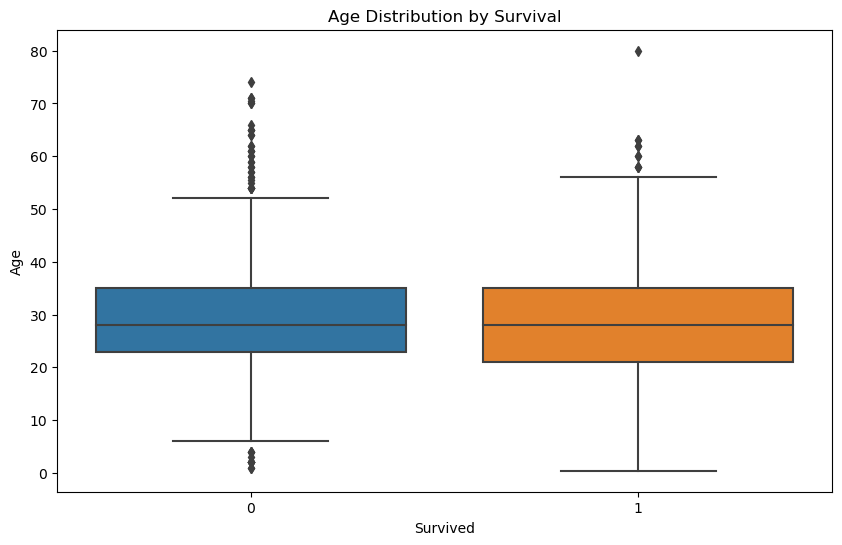

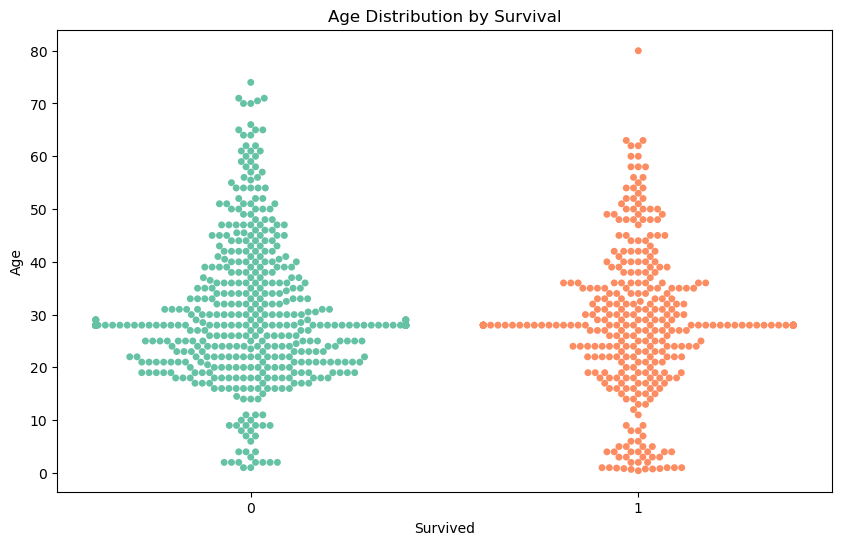

In [27]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Swarm plot (individual data points)
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Survived', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

In [28]:
def age(x):
    if x<=18:
        return "Kid"
    elif x<=35:
        return "Young"
    elif x<=50:
        return "Middle Age"
    else:
        return "Aged"
df['age_dis'] = df['Age'].apply(age)

In [29]:
df.drop(columns = ['Age'], inplace = True)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,transformed_fare_boxcox,age_dis
0,1,0,3,male,1,0,S,2.304372,Young
1,2,1,1,female,1,0,C,5.015438,Middle Age
2,3,1,3,female,0,0,S,2.398221,Young
3,4,1,1,female,1,0,S,4.723612,Young
4,5,0,3,male,0,0,S,2.414882,Young


In [31]:
df['family_size'] = df['SibSp'] + df['Parch']

In [32]:
df.drop(columns=['SibSp','Parch'], inplace = True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Sex,Embarked,transformed_fare_boxcox,age_dis,family_size
0,1,0,3,male,S,2.304372,Young,1
1,2,1,1,female,C,5.015438,Middle Age,1
2,3,1,3,female,S,2.398221,Young,0
3,4,1,1,female,S,4.723612,Young,1
4,5,0,3,male,S,2.414882,Young,0


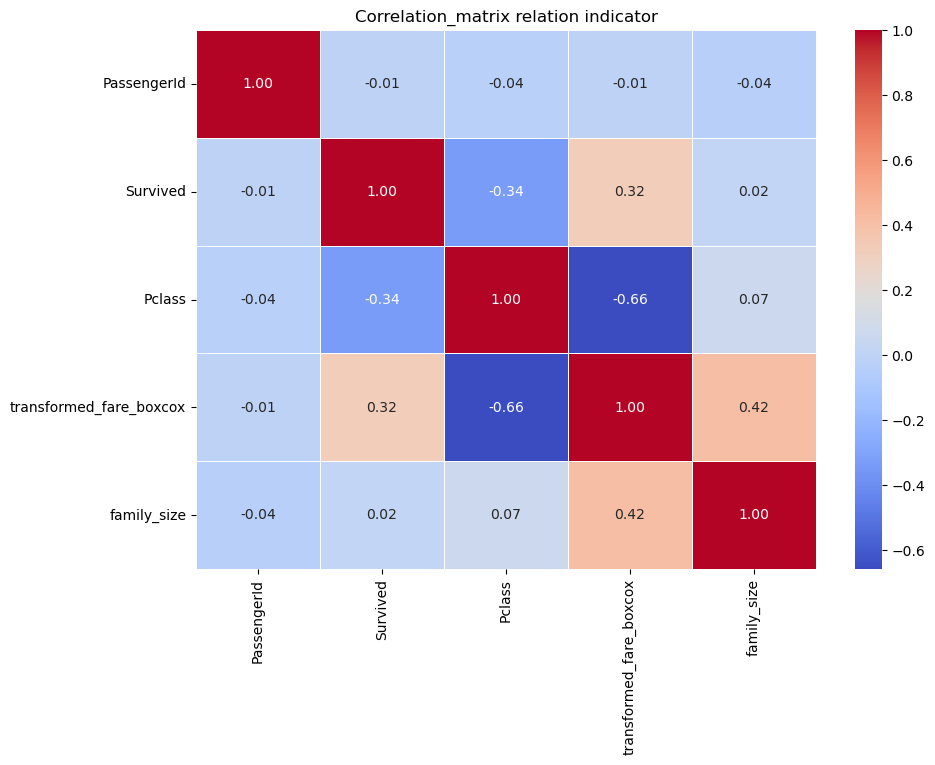

In [34]:
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10,7))

sns.heatmap(correlation_matrix, annot =True, fmt = ".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation_matrix relation indicator")
plt.show()

In [35]:
df.replace({'Sex':{'female':0, 'male':1}}, inplace = True)

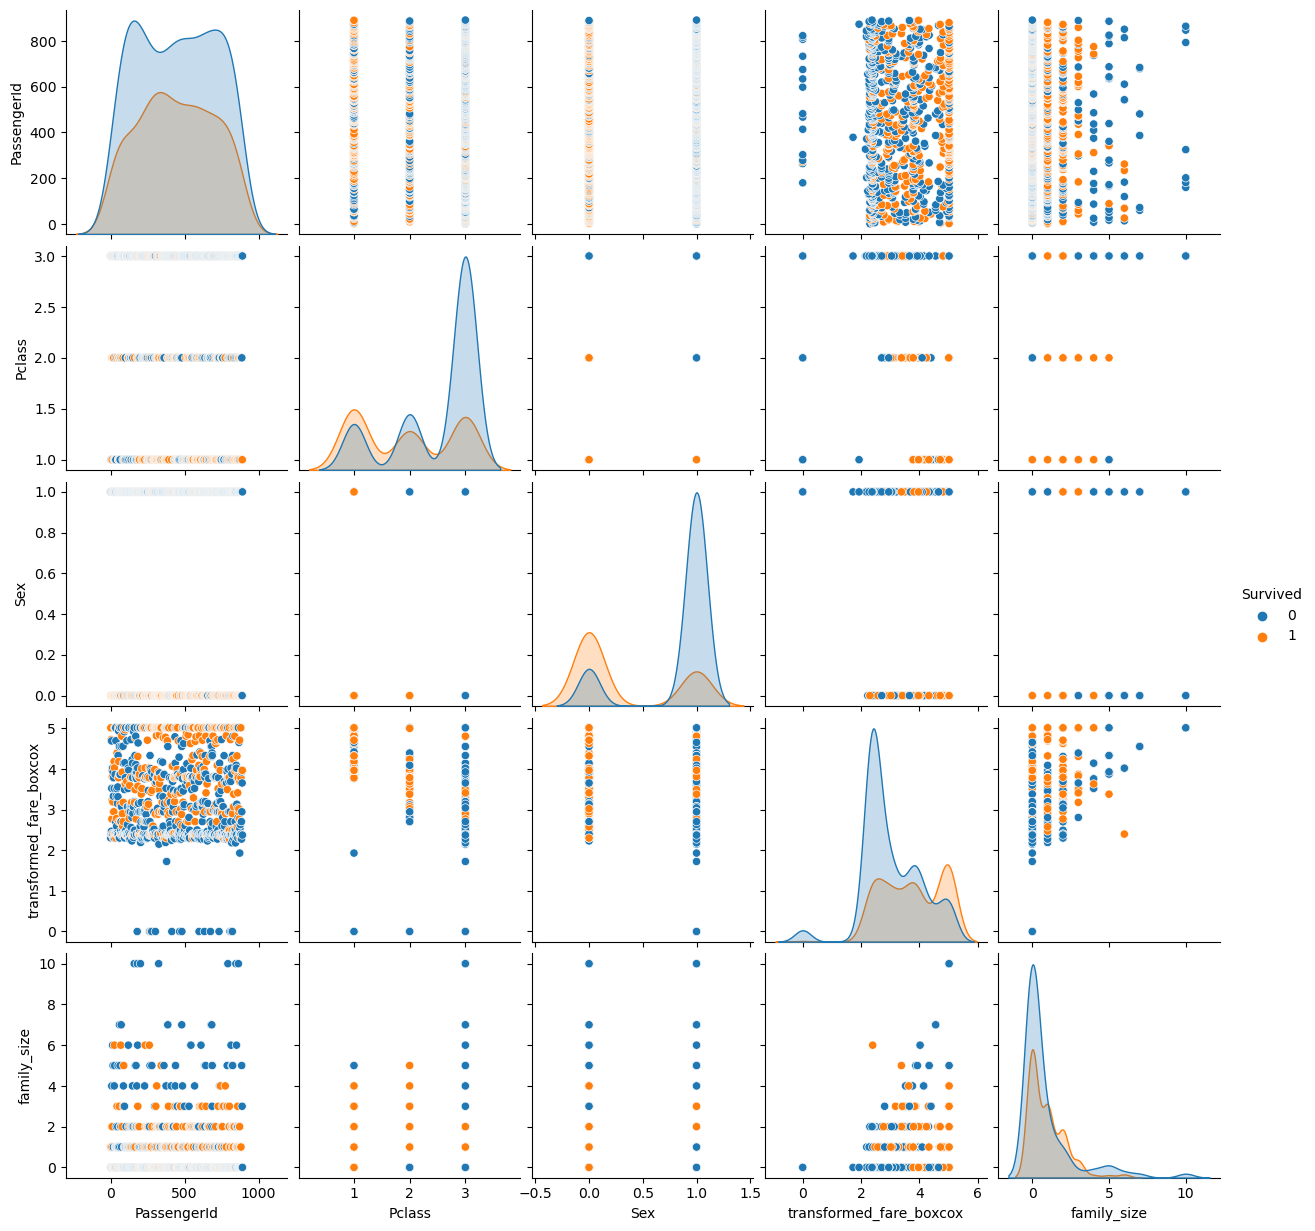

In [36]:
sns.pairplot(data=df, hue ='Survived')
plt.show()

In [37]:
# For future work create a data frame
df.to_csv("fresh_data.csv", index=False)

# Model Building & Evaluation

In [38]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.19, random_state = 42)

In [39]:
df.head()

,PassengerId,Survived,Pclass,Sex,Embarked,transformed_fare_boxcox,age_dis,family_size
0,1,0,3,1,S,2.304372,Young,1
1,2,1,1,0,C,5.015438,Middle Age,1
2,3,1,3,0,S,2.398221,Young,0
3,4,1,1,0,S,4.723612,Young,1
4,5,0,3,1,S,2.414882,Young,0


In [40]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['transformed_fare_boxcox']
ordinal_features = ['Pclass']
categorical_features = ['Sex', 'Embarked', 'age_dis']

preprocessor = ColumnTransformer( 
    transformers = [
        ("num", MinMaxScaler(), numeric_features),
        ("ord", OrdinalEncoder(), ordinal_features),
        ("cat", OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# 1. LogisticRegression

In [41]:
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['transformed_fare_boxcox']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked',
                                                   'age_dis'])])),
                ('classifier', LogisticRegression())])

In [42]:
y_pred_train_lr = lr_pipeline.predict(X_train)
y_pred_test_lr = lr_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_pred_train and y_pred_test are your predicted values
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)

print(f"Accuracy_train_LR: {accuracy_train_lr}\nAccuracy_test_LR: {accuracy_test_lr}")

cm = confusion_matrix(y_test, y_pred_test_lr)
print(f"Confusion_matrix :\n {cm}")

# Rename the variable to avoid conflicts with the function name
classification_report_lr = classification_report(y_test, y_pred_test_lr)

print(f"Classification_report:\n{classification_report_lr}")


Accuracy_train_LR: 0.7961165048543689
Accuracy_test_LR: 0.8058823529411765
Confusion_matrix :
 [[87 15]
 [18 50]]
Classification_report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       102
           1       0.77      0.74      0.75        68

    accuracy                           0.81       170
   macro avg       0.80      0.79      0.80       170
weighted avg       0.80      0.81      0.81       170



In [43]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validated scores
cross_val_scores = cross_val_score(lr_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the mean and standard deviation of cross-validated scores
print("Cross-validated Accuracy: {:.2f} (+/- {:.2f})".format(cross_val_scores.mean(), cross_val_scores.std()))


Cross-validated Accuracy: 0.79 (+/- 0.01)


# 2. RandomForest

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split= 10, n_estimators= 100))
])

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['transformed_fare_boxcox']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked',
                                                   'age_dis'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=2,
                                        min_samples_split=10))])

In [45]:
y_pred_train_rf = rf_pipeline.predict(X_train)
y_pred_test_rf = rf_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_pred_train and y_pred_test are your predicted values
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Accuracy_train_RF: {accuracy_train_rf}\nAccuracy_test_RF: {accuracy_test_rf}")

cm = confusion_matrix(y_test, y_pred_test_rf)
print(f"Confusion_matrix:\n {cm}")

# Rename the variable to avoid conflicts with the function name
classification_report_rf = classification_report(y_test, y_pred_test_rf)

print(f"Classification_report:\n{classification_report_rf}")

Accuracy_train_RF: 0.869625520110957
Accuracy_test_RF: 0.8176470588235294
Confusion_matrix:
 [[90 12]
 [19 49]]
Classification_report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       102
           1       0.80      0.72      0.76        68

    accuracy                           0.82       170
   macro avg       0.81      0.80      0.81       170
weighted avg       0.82      0.82      0.82       170



In [46]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validated scores
cross_val_scores = cross_val_score(rf_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the mean and standard deviation of cross-validated scores
print("Cross-validated Accuracy: {:.2f} (+/- {:.2f})".format(cross_val_scores.mean(), cross_val_scores.std()))


Cross-validated Accuracy: 0.82 (+/- 0.02)


# Hyperparameter tune

In [47]:
from sklearn.model_selection import GridSearchCV


rf_classifier = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Create the pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', grid_search)
])

# Fit the pipeline to the data
rf_pipeline.fit(X_train, y_train)

# Get the best parameters from the search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
y_pred_train_rf = rf_pipeline.predict(X_train)
y_pred_test_rf = rf_pipeline.predict(X_test)

# Evaluate the model
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Accuracy on Training Set: {accuracy_train_rf:.4f}")
print(f"Accuracy on Test Set: {accuracy_test_rf:.4f}")

cm_rf = confusion_matrix(y_test, y_pred_test_rf)
print(f"Confusion Matrix:\n{cm_rf}")

classification_report_rf = classification_report(y_test, y_pred_test_rf)
print(f"Classification Report:\n{classification_report_rf}")


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy on Training Set: 0.8904
Accuracy on Test Set: 0.8294
Confusion Matrix:
[[90 12]
 [17 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       102
           1       0.81      0.75      0.78        68

    accuracy                           0.83       170
   macro avg       0.83      0.82      0.82       170
weighted avg       0.83      0.83      0.83       170



# 3. SVM

In [48]:
from sklearn.svm import SVC

svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', C=1.0))
])

svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['transformed_fare_boxcox']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked',
                                                   'age_dis'])])),
                ('classifier', SVC(kernel='linear'))])

In [49]:
y_pred_train_svc = svc_pipeline.predict(X_train)
y_pred_test_svc = svc_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_pred_train and y_pred_test are your predicted values
accuracy_train_svc = accuracy_score(y_train, y_pred_train_svc)
accuracy_test_svc = accuracy_score(y_test, y_pred_test_svc)

print(f"Accuracy_train_SVC: {accuracy_train_svc}\nAccuracy_test_SVC: {accuracy_test_svc}")

cm = confusion_matrix(y_test, y_pred_test_svc)
print(f"Confusion_matrix:\n {cm}")

# Rename the variable to avoid conflicts with the function name
classification_report_svc = classification_report(y_test, y_pred_test_svc)

print(f"Classification_report:\n{classification_report_svc}")

Accuracy_train_SVC: 0.7905686546463245
Accuracy_test_SVC: 0.788235294117647
Confusion_matrix:
 [[86 16]
 [20 48]]
Classification_report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       102
           1       0.75      0.71      0.73        68

    accuracy                           0.79       170
   macro avg       0.78      0.77      0.78       170
weighted avg       0.79      0.79      0.79       170



In [50]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validated scores
cross_val_scores = cross_val_score(svc_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the mean and standard deviation of cross-validated scores
print("Cross-validated Accuracy: {:.2f} (+/- {:.2f})".format(cross_val_scores.mean(), cross_val_scores.std()))


Cross-validated Accuracy: 0.79 (+/- 0.02)


# 4. DecessionTreeClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

dc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

dc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['transformed_fare_boxcox']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked',
                                                   'age_dis'])])),
                ('classifier', DecisionTreeClassifier())])

In [52]:
y_pred_train_dc = svc_pipeline.predict(X_train)
y_pred_test_dc = svc_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_pred_train and y_pred_test are your predicted values
accuracy_train_dc = accuracy_score(y_train, y_pred_train_dc)
accuracy_test_dc = accuracy_score(y_test, y_pred_test_dc)

print(f"Accuracy_train_DC: {accuracy_train_dc}\nAccuracy_test_DC: {accuracy_test_dc}")

cm = confusion_matrix(y_test, y_pred_test_dc)
print(f"Confusion_matrix:\n {cm}")

# Rename the variable to avoid conflicts with the function name
classification_report_dc = classification_report(y_test, y_pred_test_dc)

print(f"Classification_report:\n{classification_report_dc}")

Accuracy_train_DC: 0.7905686546463245
Accuracy_test_DC: 0.788235294117647
Confusion_matrix:
 [[86 16]
 [20 48]]
Classification_report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       102
           1       0.75      0.71      0.73        68

    accuracy                           0.79       170
   macro avg       0.78      0.77      0.78       170
weighted avg       0.79      0.79      0.79       170



In [53]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validated scores
cross_val_scores = cross_val_score(dc_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the mean and standard deviation of cross-validated scores
print("Cross-validated Accuracy: {:.2f} (+/- {:.2f})".format(cross_val_scores.mean(), cross_val_scores.std()))

Cross-validated Accuracy: 0.76 (+/- 0.03)


# 5. KNeighborsClassifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

kn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

kn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['transformed_fare_boxcox']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked',
                                                   'age_dis'])])),
                ('classifier', KNeighborsClassifier())])

In [55]:
y_pred_train_kn = kn_pipeline.predict(X_train)
y_pred_test_kn = kn_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_pred_train and y_pred_test are your predicted values
accuracy_train_kn = accuracy_score(y_train, y_pred_train_kn)
accuracy_test_kn = accuracy_score(y_test, y_pred_test_kn)

print(f"Accuracy_train_KN: {accuracy_train_kn}\nAccuracy_test_KN: {accuracy_test_kn}")

cm = confusion_matrix(y_test, y_pred_test_kn)
print(f"Confusion_matrix:\n {cm}")

# Rename the variable to avoid conflicts with the function name
classification_report_kn = classification_report(y_test, y_pred_test_kn)

print(f"Classification_report:\n{classification_report_kn}")

Accuracy_train_KN: 0.7212205270457698
Accuracy_test_KN: 0.5823529411764706
Confusion_matrix:
 [[76 26]
 [45 23]]
Classification_report:
              precision    recall  f1-score   support

           0       0.63      0.75      0.68       102
           1       0.47      0.34      0.39        68

    accuracy                           0.58       170
   macro avg       0.55      0.54      0.54       170
weighted avg       0.56      0.58      0.57       170



# 6. GradientBoostingClassifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=110, learning_rate=0.02))
])

gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['transformed_fare_boxcox']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked',
                                                   'age_dis'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.02,
                                            n_estimators=110))])

In [57]:
y_pred_train_gb = gb_pipeline.predict(X_train)
y_pred_test_gb = gb_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_pred_train and y_pred_test are your predicted values
accuracy_train_gb = accuracy_score(y_train, y_pred_train_gb)
accuracy_test_gb = accuracy_score(y_test, y_pred_test_gb)

print(f"Accuracy_train_GB: {accuracy_train_gb}\nAccuracy_test_gb: {accuracy_test_gb}")

cm = confusion_matrix(y_test, y_pred_test_gb)
print(f"Confusion_matrix:\n {cm}")

# Rename the variable to avoid conflicts with the function name
classification_report_gb = classification_report(y_test, y_pred_test_gb)

print(f"Classification_report:\n{classification_report_gb}")

Accuracy_train_GB: 0.8307905686546463
Accuracy_test_gb: 0.8117647058823529
Confusion_matrix:
 [[90 12]
 [20 48]]
Classification_report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       102
           1       0.80      0.71      0.75        68

    accuracy                           0.81       170
   macro avg       0.81      0.79      0.80       170
weighted avg       0.81      0.81      0.81       170



In [58]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validated scores
cross_val_scores = cross_val_score(gb_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the mean and standard deviation of cross-validated scores
print("Cross-validated Accuracy: {:.2f} (+/- {:.2f})".format(cross_val_scores.mean(), cross_val_scores.std()))


Cross-validated Accuracy: 0.80 (+/- 0.02)


In [60]:
# Define the hyperparameter grid to search
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(gb_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters on the entire training set
best_gb_model = gb_pipeline.set_params(**best_params)
best_gb_model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = best_gb_model.predict(X_train)
accuracy = accuracy_score(y_train, y_val_pred)
print(f"Validation Accuracy: {accuracy}")

# Test the final model on the test set
y_test_pred = best_gb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Best Hyperparameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Validation Accuracy: 0.8904299583911235
Test Accuracy: 0.8176470588235294


Decision: here RandomForestClassifier or GradientBoodting may apply for better accuracy!

# Make Prediction

In [61]:
def predict_survival(passenger_id, model, df):
    passenger_data = df[df['PassengerId'] == passenger_id]

    if not passenger_data.empty:
        # Extract relevant features for prediction
        features = passenger_data.drop('Survived', axis=1)

        # Make prediction
        prediction = rf_pipeline.predict(features)

        return f"Passenger {passenger_id} is predicted to {'survive' if prediction[0] == 1 else 'not survive'}."

    return f"No data found for Passenger {passenger_id}."

# Example usage
passenger_id_to_predict =801
result = predict_survival(passenger_id_to_predict, rf_pipeline, df)
print(result)

Passenger 801 is predicted to not survive.
